<font size=24 >**UBER TRIP ANALYSIS**</font>

In [1]:
#To read the dataset
import pandas as pd 

#For visualization
import matplotlib.pyplot as plt

In [2]:
#Read the dataset
uber= pd.read_csv("Downloads/uber-raw-data-sep14.csv")

#Display the first 5 records
uber.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01,40.2201,-74.0021,B02512
1,9/1/2014 0:01,40.7500,-74.0027,B02512
2,9/1/2014 0:03,40.7559,-73.9864,B02512
3,9/1/2014 0:06,40.7450,-73.9889,B02512
4,9/1/2014 0:11,40.8145,-73.9444,B02512


In [3]:
#Display the last 5 records
uber.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58,40.7140,-73.9496,B02764


In [4]:
#Find the shape of the dataset
uber.shape

(1028136, 4)

In [5]:
#Understand the dataset properties
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [6]:
#Change the "Date/Time" column's data type from string to datetime
uber['Date/Time']= pd.to_datetime(uber['Date/Time'])
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


In [7]:
#Convert "Date/Time" column from string data type into DateTime
uber["Day"] = uber["Date/Time"].apply(lambda x: x.day)
uber["Hour"] = uber["Date/Time"].apply(lambda x: x.hour)
uber["Weekday"] = uber["Date/Time"].apply(lambda x: x.weekday())
uber.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


Text(0, 0.5, 'Density of rides')

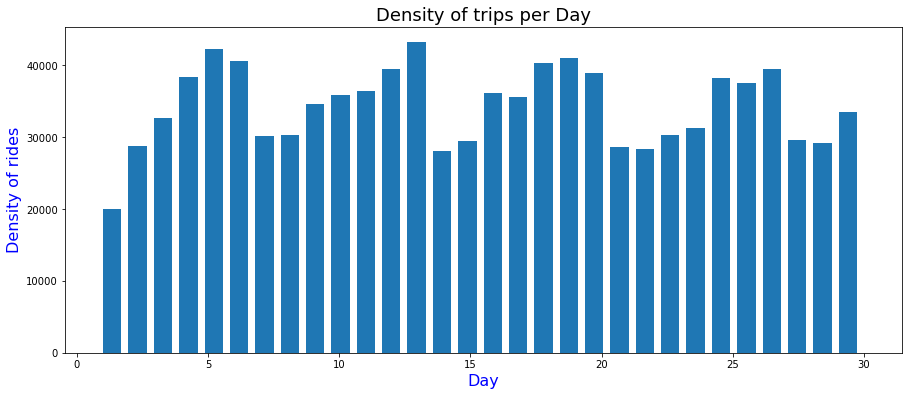

In [26]:
#Visualize the Density of rides per Day of month
fig,ax = plt.subplots(figsize = (15,6))
plt.hist(uber.Day, width= 0.7, bins= 30)
plt.title("Density of trips per Day", fontsize=18)
plt.xlabel("Day", fontsize=16, color="blue")
plt.ylabel("Density of rides", fontsize=16, color="blue")

### We concluded from this plot that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

Text(0, 0.5, 'Density of rides')

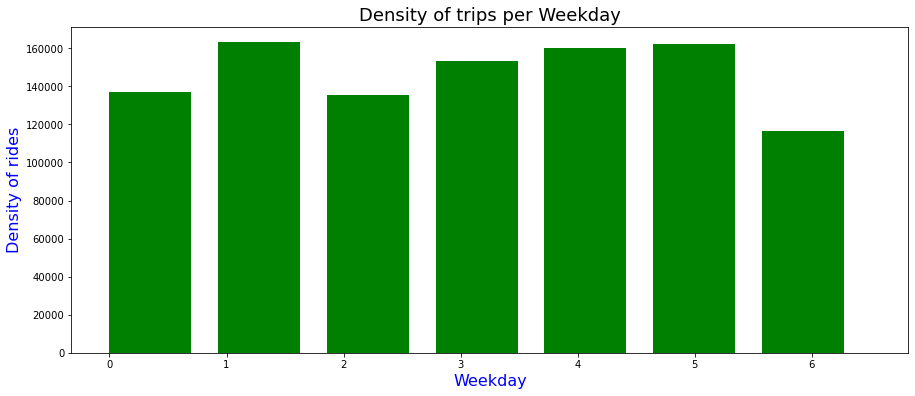

In [30]:
#Visualize the Density of rides per Weekday
fig,ax = plt.subplots(figsize = (15,6))
plt.hist(uber.Weekday, width= 0.7, range= (0, 6.5), bins=7, color= "green")
plt.title("Density of trips per Weekday", fontsize=18)
plt.xlabel("Weekday", fontsize=16, color="blue")
plt.ylabel("Density of rides", fontsize=16, color="blue")

### We concluded from this that Monday is the busiest day of the week.

Text(0, 0.5, 'Density of rides')

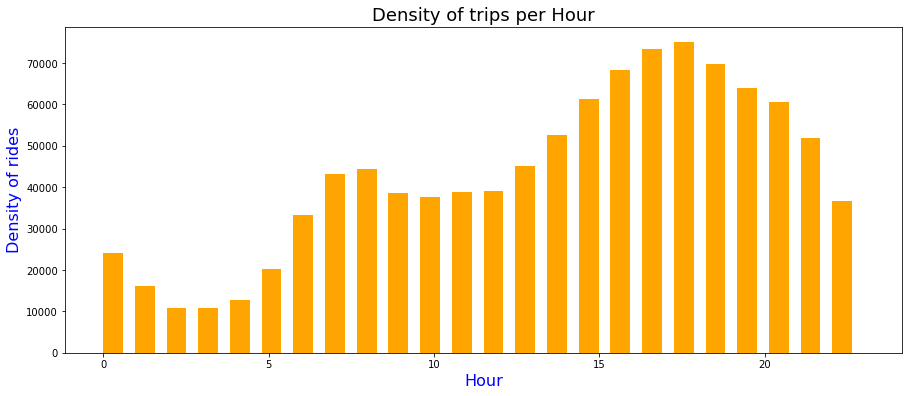

In [29]:
#Visualize the Density of rides per hour
fig,ax = plt.subplots(figsize = (15,6))
plt.hist(uber.Hour, width= 0.6, bins=24, color= "orange")
plt.title("Density of trips per Hour", fontsize=18)
plt.xlabel("Hour", fontsize=16, color="blue")
plt.ylabel("Density of rides", fontsize=16, color="blue")

#### It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.

Text(0, 0.5, 'Density of rides')

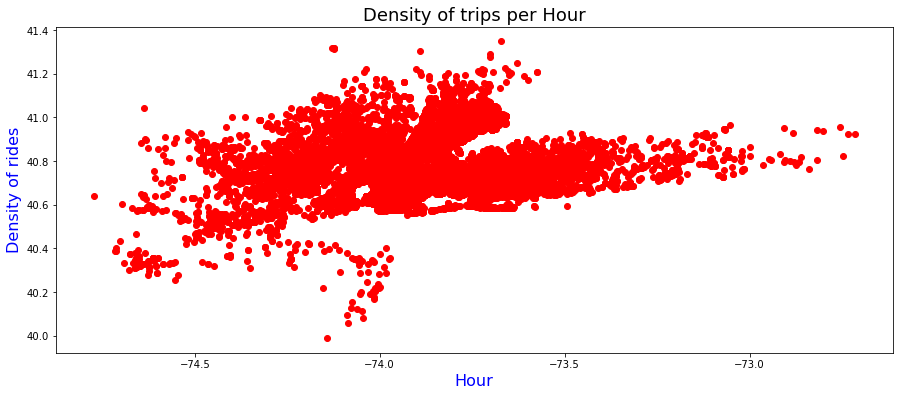

In [31]:
#Visualize the Density of rides per location
fig,ax = plt.subplots(figsize = (15,6))
x= uber.Lon
y= uber.Lat
plt.scatter(x, y, color= "red")
plt.title("Density of trips per Hour", fontsize=18)
plt.xlabel("Hour", fontsize=16, color="blue")
plt.ylabel("Density of rides", fontsize=16, color="blue")

#### The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.
